In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
pal = sns.color_palette("Set1")
red_color = pal[0]
green_color = pal[2]

In [2]:
import FlowCytometryTools # http://gorelab.bitbucket.org/flowcytometrytools/

In [231]:
well = '03'
datafile=r"D:/Google Drive/ex silico/flow/competition/2015-05-18/MB2015-05-18_calibration_D1-10_no8.0%s.fcs" % well
print datafile
sample = FlowCytometryTools.FCMeasurement(ID="ROW_D_TS", datafile=datafile)

print sample.meta['$DATE']
print sample.meta['$SYS'], sample.meta['$OP']
print "Cell count", sample.meta['$TOT']

D:/Google Drive/ex silico/flow/competition/2015-05-18/MB2015-05-18_calibration_D1-10_no8.003.fcs
2015-May-18
MACSQuantify,2.5.1345.9863 Maayan Bibi
Cell count 20000


In [232]:
print sample.meta['$DATE']
print sample.meta['$SYS'], sample.meta['$OP']
print "Cell count", sample.meta['$TOT']
print sample.channel_names

2015-May-18
MACSQuantify,2.5.1345.9863 Maayan Bibi
Cell count 20000
('HDR-T', 'FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'VioGreen-A', 'VioGreen-H', 'VioGreen-W', 'dsRed/txRed-A', 'dsRed/txRed-H', 'dsRed/txRed-W')


### Forward and Side Scatter

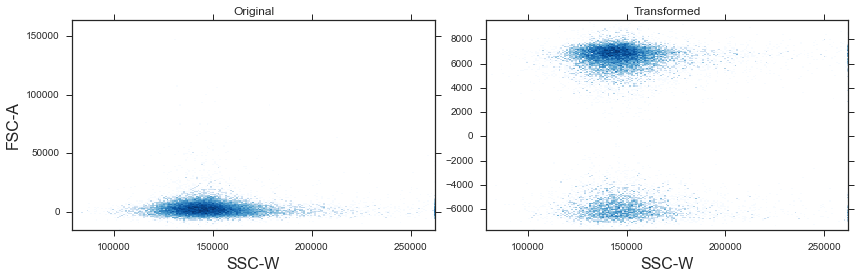

In [233]:
tsample = sample.transform('hlog', b=1,  channels=['FSC-A'])

fig,ax = plt.subplots(1, 2, figsize=(12,4))
sample.plot(['SSC-W', 'FSC-A'], cmap="Blues", ax=ax[0]);
tsample.plot(['SSC-W', 'FSC-A'], cmap="Blues", ax=ax[1])
ax[0].set_title("Original")
ax[1].set_title("Transformed")
ax[1].set_ylabel('')
fig.tight_layout()

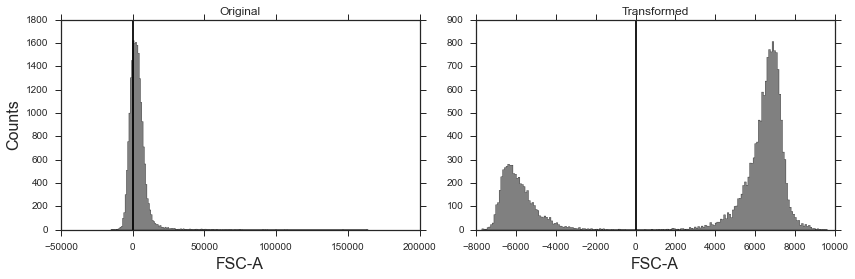

In [234]:
scatter_thgate = FlowCytometryTools.ThresholdGate(0.0, 'FSC-A', region='above')

fig,ax = plt.subplots(1, 2, figsize=(12,4))
sample.plot('FSC-A', gates=scatter_thgate,  ax=ax[0], gate_colors='k');
tsample.plot('FSC-A', gates=scatter_thgate, ax=ax[1], gate_colors='k')
ax[0].set_title("Original")
ax[1].set_title("Transformed")
ax[1].set_ylabel('')
fig.tight_layout()

In: 14456
Out: 5544


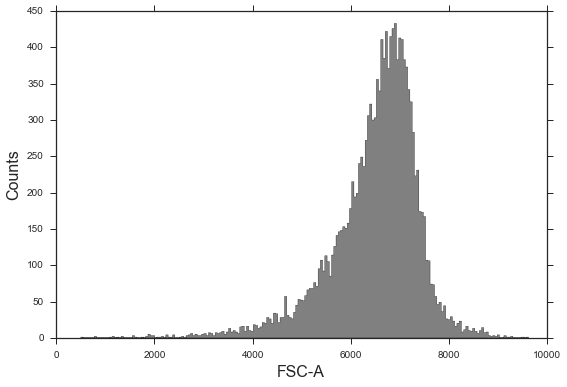

In [235]:
gsample = tsample.gate(scatter_thgate)
gsample.plot('FSC-A')
plt.tight_layout()

print "In:", gsample.counts
print "Out:", tsample.gate(~scatter_thgate).counts

### Flourescence

In [236]:
green = 'VioGreen-H'# 'VioGreen-A', 'VioGreen-H',
red =  'dsRed/txRed-H'#, 'dsRed/txRed-H', 'dsRed/txRed-W'
print well

03


In [237]:
ridx = gsample.data[red] < 0
print (ridx).mean()

gidx = gsample.data[green] < 0
print (gidx).mean()

6.91754288877e-05
0.0


In [238]:
gsample.data[red][ridx] = 0
ridx = gsample.data[red] < 0
print (idx).sum()

gsample.data[green][gidx] = 0
gidx = gsample.data[green] < 0
print (idx).sum()

0
0


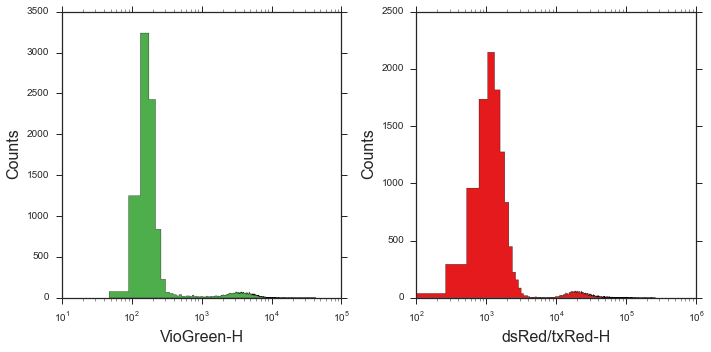

In [239]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
gsample.plot(green, ax=ax[0], color=green_color, bins=1000)
gsample.plot(red, ax=ax[1], color=red_color, bins=1000)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
fig.tight_layout()

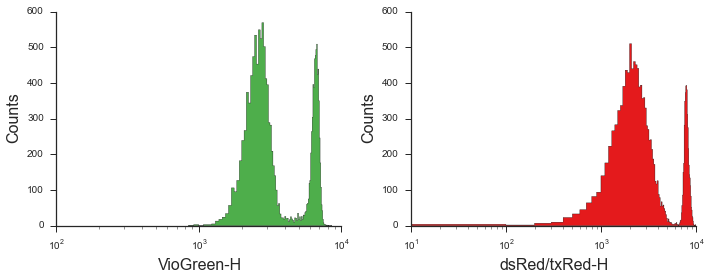

In [240]:
tsample = gsample.transform('hlog', b=1e3, auto_range=False, channels=[red]).transform('hlog', b=1e2,  channels=[green])

fig,ax = plt.subplots(1,2,figsize=(10,4))
tsample.plot(green, ax=ax[0], color=green_color, bins=100)
tsample.plot(red, ax=ax[1], color=red_color, bins=100)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
fig.tight_layout()
sns.despine()

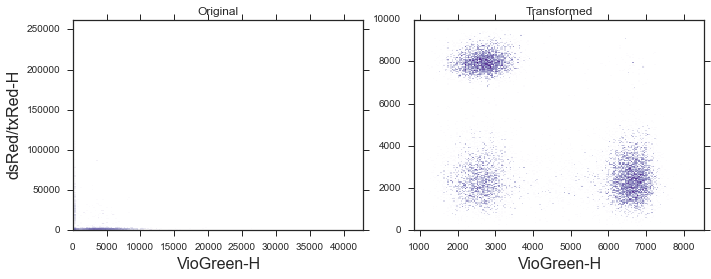

In [241]:
fig,ax = plt.subplots(1, 2, figsize=(10,4))
gsample.plot([green, red], cmap="Purples", ax=ax[0]);
tsample.plot([green, red], cmap="Purples", ax=ax[1])
ax[0].set_title("Original")
ax[1].set_title("Transformed")
ax[1].set_ylabel('')
fig.tight_layout()

In [242]:
green_th = 4500
red_th = 5500

green_thgate = FlowCytometryTools.ThresholdGate(green_th, green, region='above')
red_thgate = FlowCytometryTools.ThresholdGate(red_th, red, region='above')

green_gate = FlowCytometryTools.core.gates.QuadGate([green_th, red_th], [green, red], 'bottom right', 'green')
red_gate = FlowCytometryTools.core.gates.QuadGate([green_th, red_th], [green, red], 'top left', 'red')

green: 0.58731688512
red: 0.41268311488


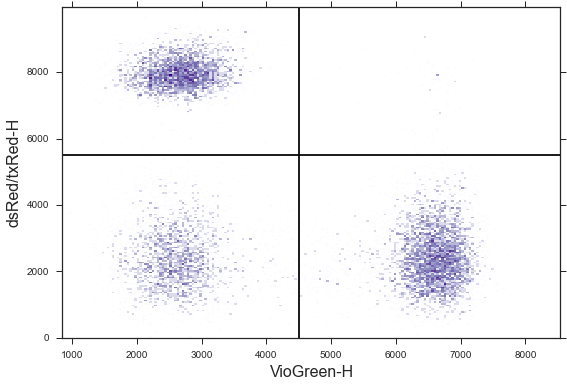

In [249]:
tsample.plot([green, red], gates=[green_gate, red_gate], gate_colors='k', cmap="Purples")
plt.tight_layout()

green_count = tsample.gate(green_gate).counts
red_count = tsample.gate(red_gate).counts
print "green:", green_count / float(green_count+red_count)
print "red:", red_count / float(green_count+red_count)

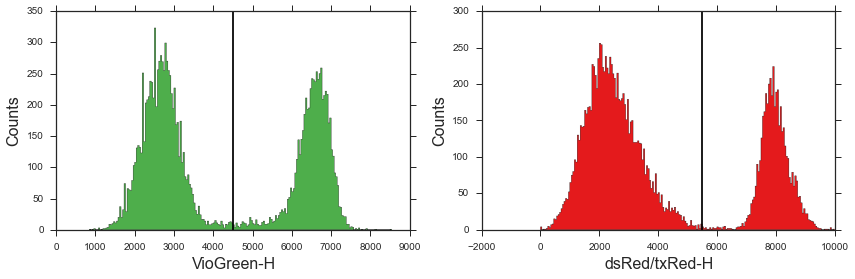

In [244]:
fig,ax = plt.subplots(1, 2, figsize=(12,4))
tsample.plot(green, gates=[green_thgate], color=green_color, gate_colors='k', ax=ax[0])
tsample.plot(red, gates=[red_thgate], color=red_color, gate_colors='k', ax=ax[1])
fig.tight_layout()

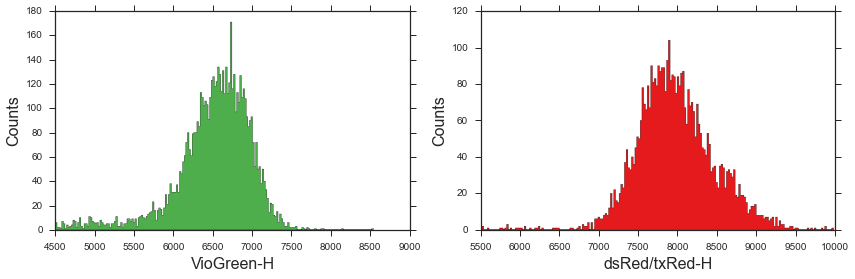

In [245]:
gated_green = tsample.gate(green_gate)
gated_red = tsample.gate(red_gate)

fig,ax = plt.subplots(1, 2, figsize=(12,4))
gated_green.plot(green, color=green_color, ax=ax[0])
gated_red.plot(red, color=red_color, ax=ax[1])
fig.tight_layout()

## Plate - calibration

In [199]:
green_count = gated_green.data.shape[0]
red_count = gated_red.data.shape[0]
total = float(green_count + red_count)
print "Green: %.4f" % (green_count/total)
print "Red:   %.4f" % (red_count/total)

Green: 0.0040
Red:   0.9960


In [280]:
datadir = r"D:/Google Drive/ex silico/flow/competition/2015-05-18/"
print datadir
plate = FlowCytometryTools.FCPlate.from_dir(ID='calibration', path=datadir, parser='number_col',
                                            pattern='MB2015-05-18_calibration_A1-10_no8.*.fcs')
plate = plate.dropna()
print plate

D:/Google Drive/ex silico/flow/competition/2015-05-18/
ID:
calibration

Data:
   1  2  3  4  5  6  7  8  9
A  1  2  3  4  5  6  7  8  9


In [281]:
plate = plate.transform('hlog', b=1,  channels=['FSC-A'])
plate = plate.gate(scatter_thgate)
plate = plate.transform('hlog', b=1, channels=[green])
plate = plate.transform('hlog', b=2000,  channels=[red])

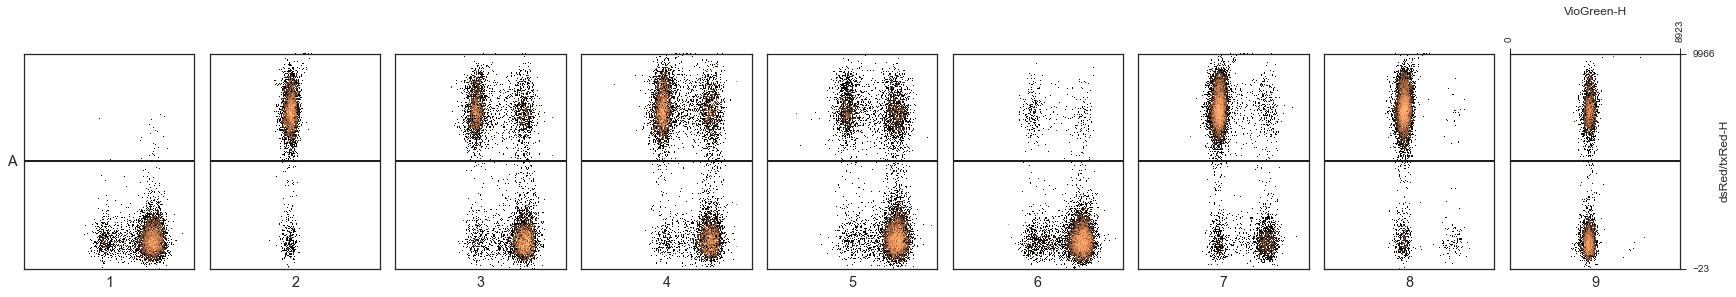

In [282]:
width = 24
height = int(width * 2/12.)

main_ax, ax = plate.plot([green, red], gates=[green_gate, red_gate], gate_colors='k')#, cmap="BuGn")
fig = main_ax.figure
fig.set_size_inches(width, height)
fig.tight_layout()

In [283]:
counts = pd.concat((plate.gate(green_gate).counts(), plate.gate(red_gate).counts()))
counts.index = ['green', 'red']
counts = counts/counts.sum(axis=0)
counts

,1,2,3,4,5,6,7,8,9
green,1,1,1,1,1,1,1,1,1
red,0,0,0,0,0,0,0,0,0


In [284]:
from GoreUtilities import plot_heat_map

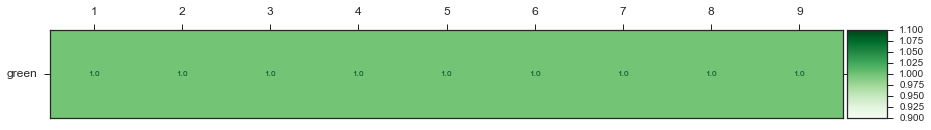

In [285]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax = plot_heat_map(counts[counts.index=='green'], include_values=True, show_colorbar=True, cmap="Greens", ax=ax)

## Plate - competition

In [286]:
datadir = r"D:/Google Drive/ex silico/flow/competition/2015-05-19/"
print datadir
plate = FlowCytometryTools.FCPlate.from_dir(ID='F_ROW_TS', path=datadir, parser='number',
                                            pattern='MB2015-05-19_F_ROW_TS.*.fcs')
plate = plate.dropna()
# plate.data.pop(1)
# plate.data.pop(2)
# plate.data.pop(3)
print plate

D:/Google Drive/ex silico/flow/competition/2015-05-19/
ID:
F_ROW_TS

Data:
  1   2   3   4   5   6   7   8   9   10  11  12
A  1   9  17  25  33  41  49  57  65  73  81  89
B  2  10  18  26  34  42  50  58  66  74  82  90
C  3  11  19  27  35  43  51  59  67  75  83  91
D  4  12  20  28  36  44  52  60  68  76  84  92
E  5  13  21  29  37  45  53  61  69  77  85  93
F  6  14  22  30  38  46  54  62  70  78  86  94
G  7  15  23  31  39  47  55  63  71  79  87  95
H  8  16  24  32  40  48  56  64  72  80  88  96


In [287]:
plate = plate.transform('hlog', b=1,  channels=['FSC-A'])
plate = plate.gate(scatter_thgate)
plate = plate.transform('hlog', b=1, channels=[green])
plate = plate.transform('hlog', b=2000,  channels=[red])

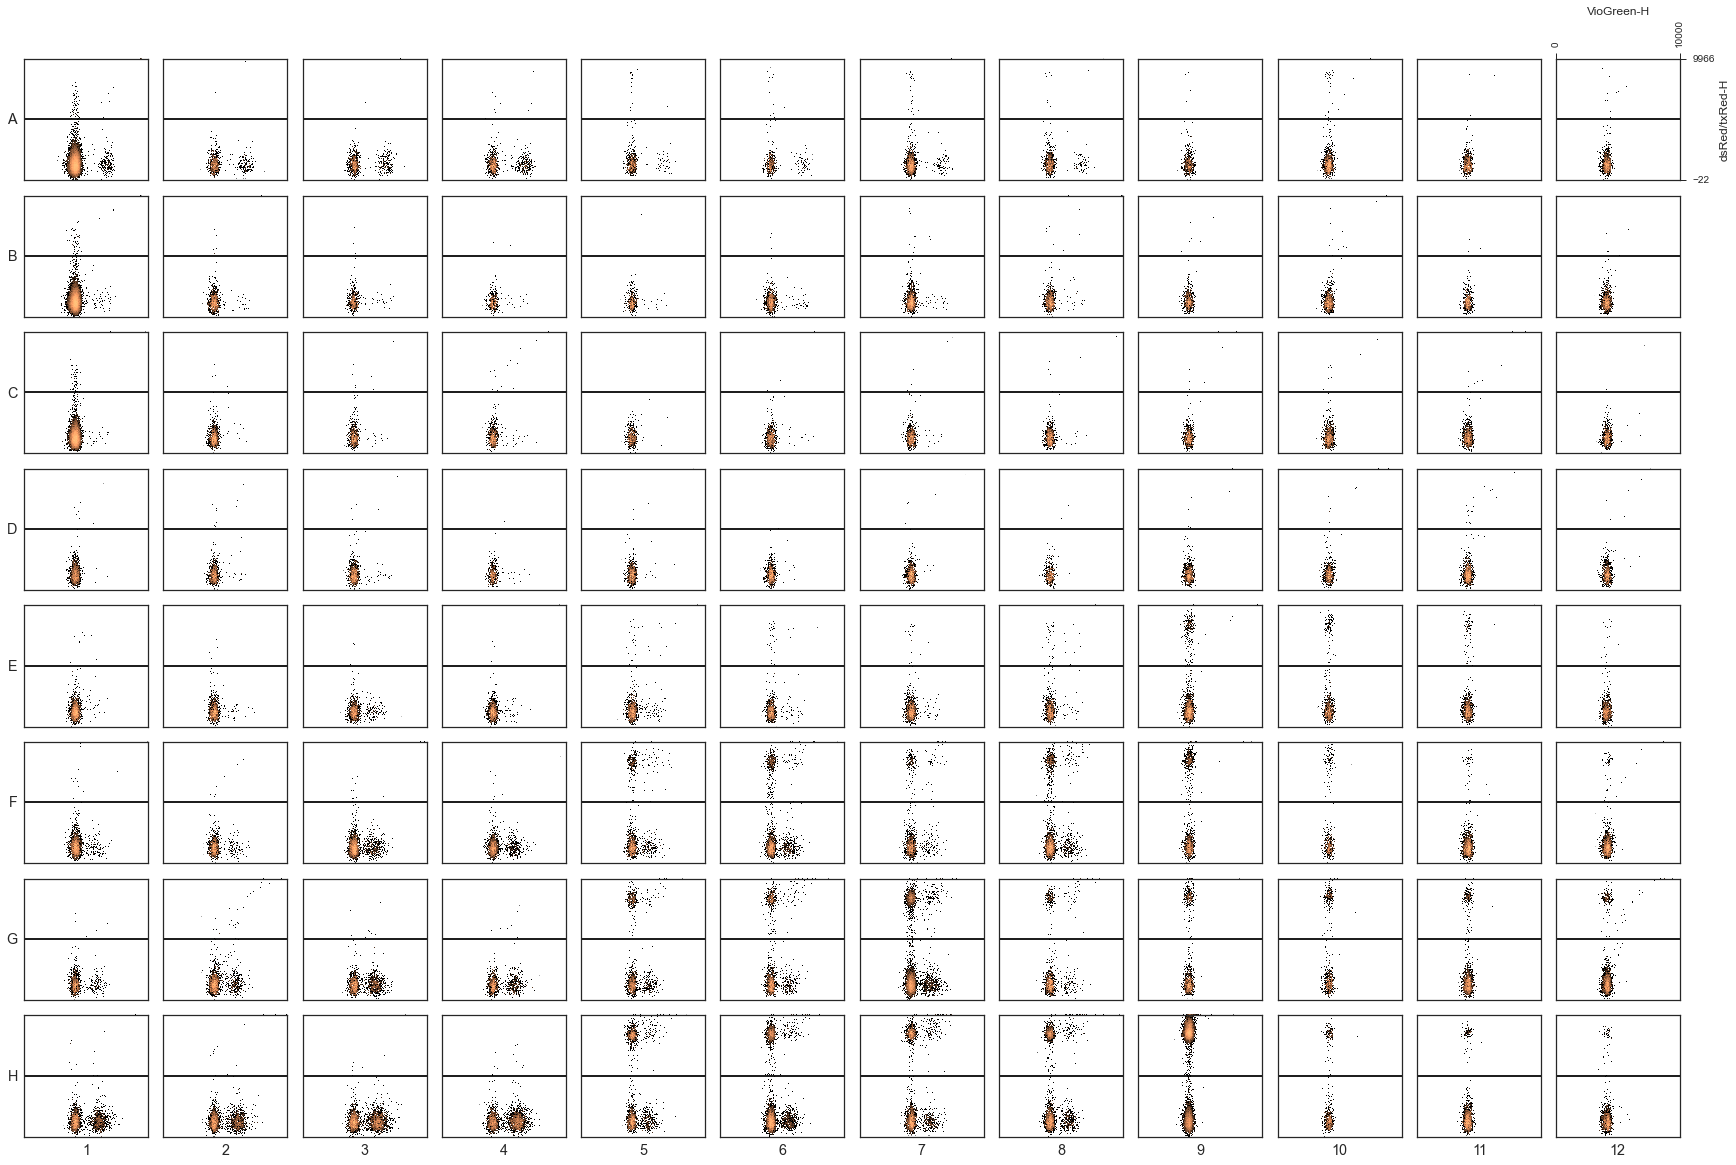

In [288]:
width = 24
height = int(width * 8/12.)

main_ax, ax = plate.plot([green, red], gates=[green_gate, red_gate], gate_colors='k')#, cmap="BuGn")
fig = main_ax.figure
fig.set_size_inches(width, height)
fig.tight_layout()

In [289]:
green_count = plate.gate(green_gate).counts()
green_min = green_count.iloc[:,8:12].min().min()
green_count - green_min

,1,2,3,4,5,6,7,8,9,10,11,12
A,53710,1617,1181,944,365,658,1916,871,167,736,1241,4050
B,44021,1118,435,158,143,403,2198,710,0,396,23,3132
C,27318,1106,465,361,398,315,1698,575,309,698,917,2899
D,6514,1518,925,606,457,396,1586,467,109,97,1965,1897
E,3748,1058,5278,1344,1453,2008,2561,2030,1555,1603,1286,2430
F,3951,2985,4675,3625,2551,3552,3569,3681,1673,1018,3341,2824
G,3462,3358,6787,4516,2134,2245,9718,1923,1132,1563,2909,3349
H,4548,4824,11827,10155,3375,9544,4272,3641,15766,703,3586,2330


In [290]:
red_count = plate.gate(red_gate).counts()
red_min = red_count.iloc[:,0:4].min().min()
red_count - red_min

,1,2,3,4,5,6,7,8,9,10,11,12
A,0,0,0,0,0,0,0,0,0,0,0,0
B,0,0,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,0,0
D,0,0,0,0,0,0,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0,0,0
H,0,0,0,0,0,0,0,0,0,0,0,0
